## 1. Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

## 2. Loading Dataset

df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
print(df.dtypes.unique())

[dtype('int64') dtype('float64')]


In [8]:
100*(df.isnull().sum())/(df.shape[0])

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

The dataset is pretty much structured and does not have any NaN values. So we do not need Data Cleaning.

## 3. Exploratory Data Analysis

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

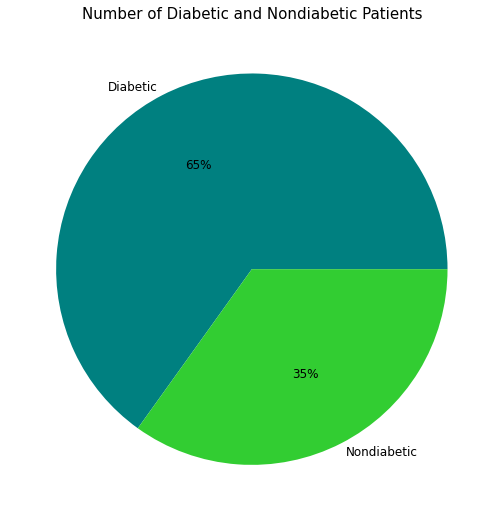

In [10]:
plt.figure(figsize=(9,9))
plt.pie(x=[500,268], labels=[ 'Diabetic', 'Nondiabetic'], autopct='%1.0f%%',pctdistance=0.6,labeldistance=1.05,textprops={'fontsize':12},colors=['teal','limegreen'])
plt.title('Number of Diabetic and Nondiabetic Patients',loc='center', fontsize=15)
plt.show()

In [11]:
df['Outcome']=df['Outcome'].apply(lambda x: 'Diabetic' if x==1 else 'Nondiabetic')

In [12]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Nondiabetic


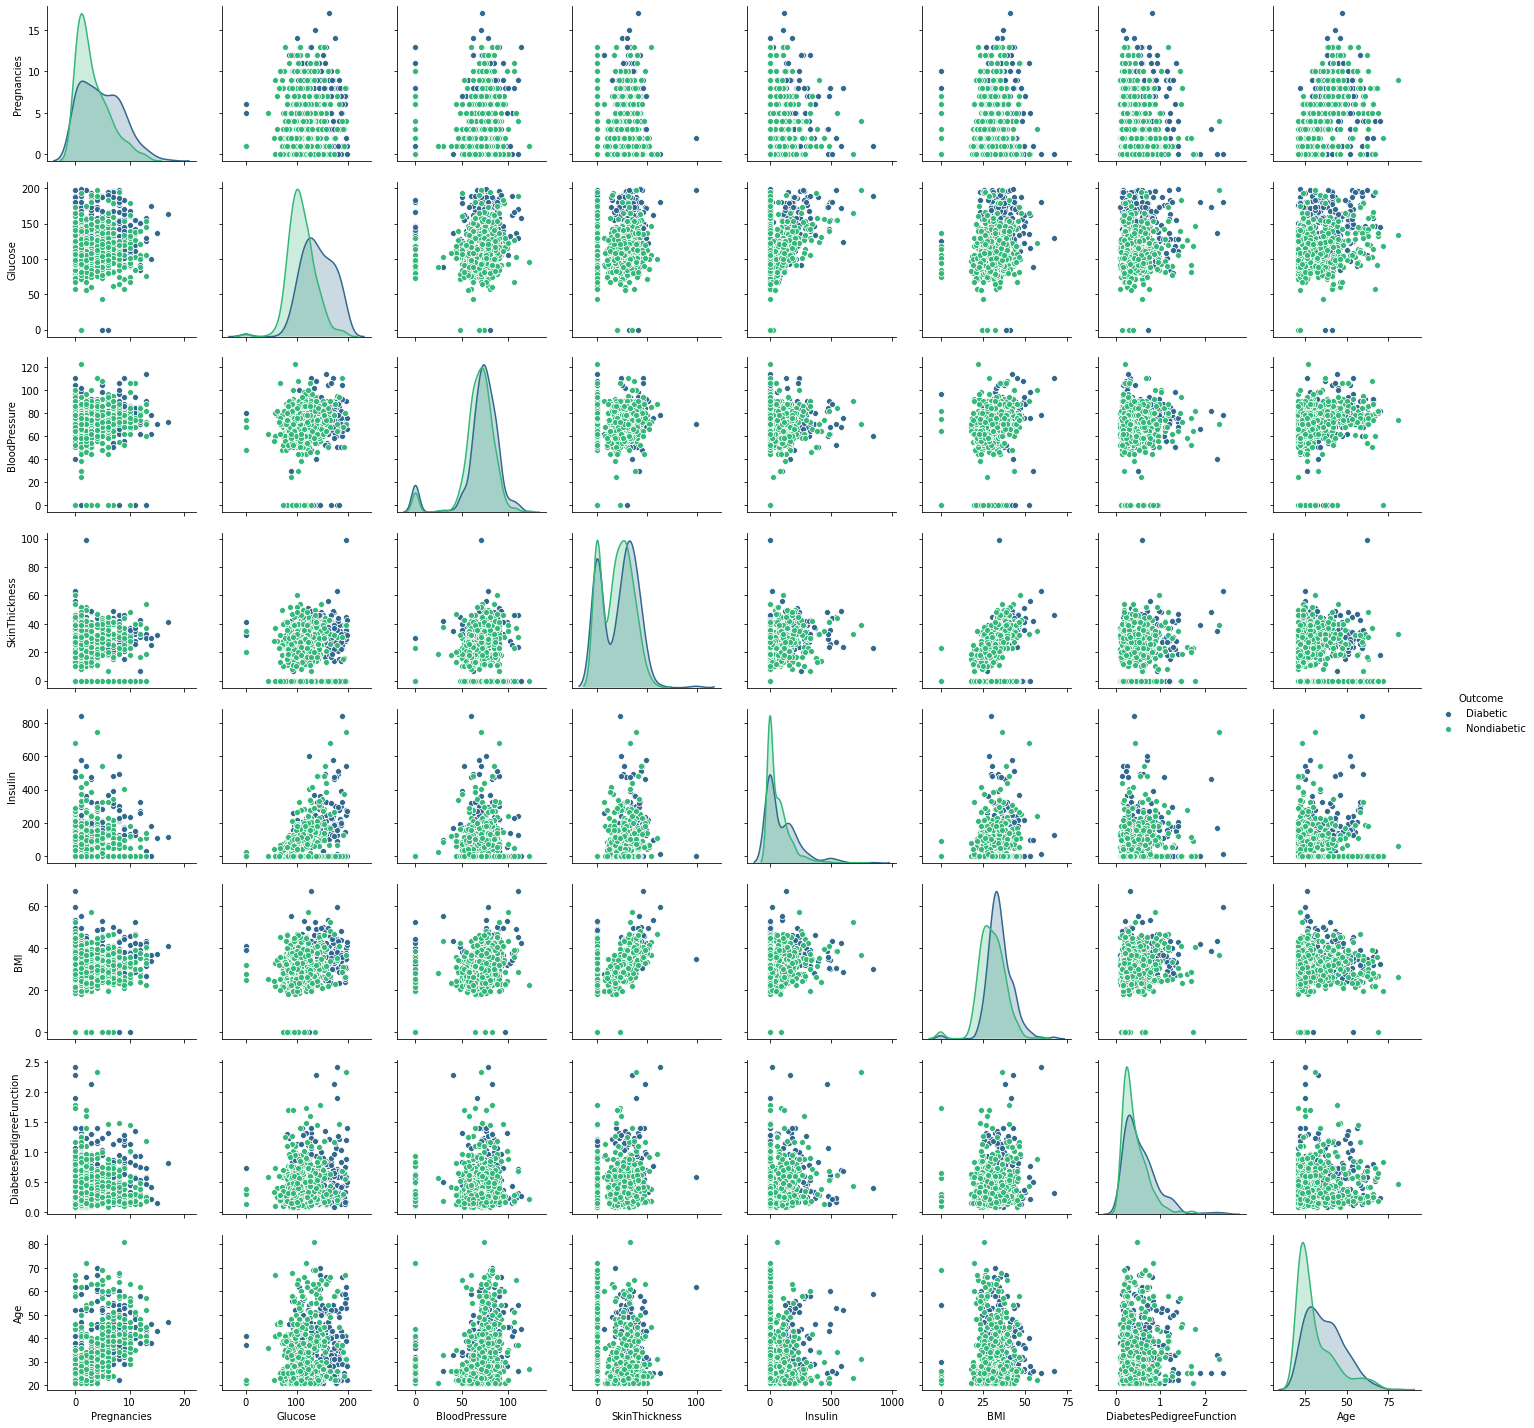

In [13]:
sns.pairplot(df,hue='Outcome',palette='viridis')
plt.show()

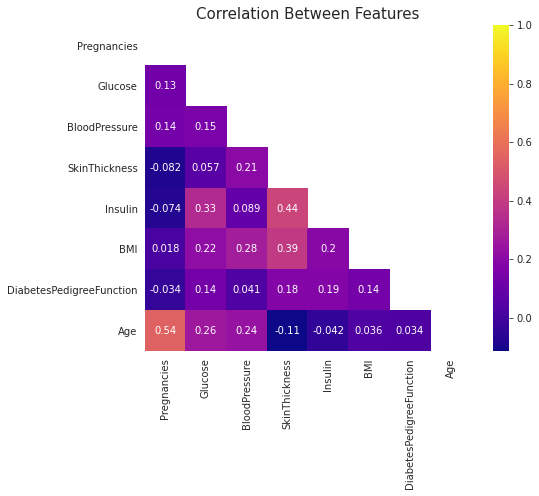

In [14]:
plt.figure(figsize=(8,6))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True, cmap= 'plasma')
plt.title('Correlation Between Features', fontsize=15)
plt.show()

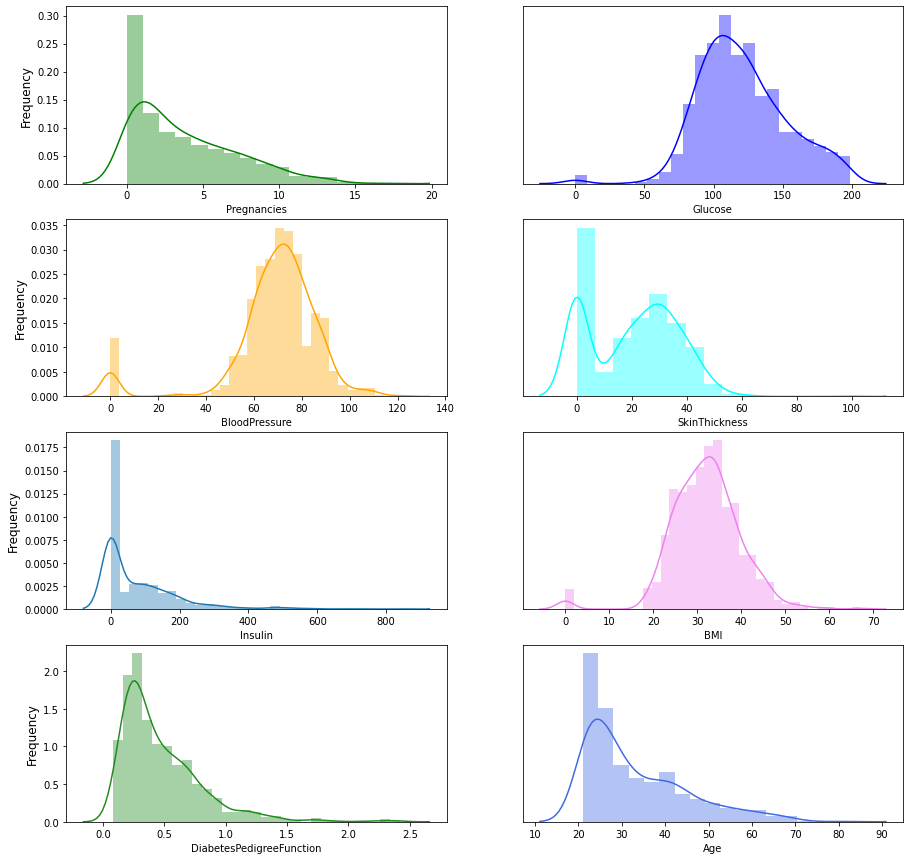

In [15]:
plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.distplot(df['Pregnancies'], color='green')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,2)
sns.distplot(df['Glucose'], color='blue')
plt.yticks([])

plt.subplot(4,2,3)
sns.distplot(df['BloodPressure'], color='orange')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,4)
sns.distplot(df['SkinThickness'], color='cyan')
plt.yticks([])

plt.subplot(4,2,5)
sns.distplot(df['Insulin'])
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,6)
sns.distplot(df['BMI'], color='violet')
plt.yticks([])

plt.subplot(4,2,7)
sns.distplot(df['DiabetesPedigreeFunction'], color='forestgreen')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,8)
sns.distplot(df['Age'], color='royalblue')
plt.yticks([])
plt.show()

## 4. Prediction of Diabetes Outcome

### 4.1. K-Nearest Neighbors Classifier

#### 4.1.1. Standardizing the Data

In [16]:
ss=StandardScaler()

In [17]:
ss.fit(df.drop(['Outcome'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled=ss.transform(df.drop(['Outcome'], axis=1))

In [19]:
scaled_df=pd.DataFrame(data=scaled, columns=df.columns[:-1])

#### 4.1.2. Splitting the Data

In [20]:
X=scaled_df
y=df['Outcome']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 4.1.3. Finding the Optimal number of Neighbors (K)

In [22]:
error_rate=[]

for n in range(1,40):
    knc=KNeighborsClassifier(n_neighbors=n)
    knc.fit(X_train, y_train)
    prediction_knn=knc.predict(X_test)
    error_rate.append(np.mean(prediction_knn!=y_test))
print(error_rate)

[0.2792207792207792, 0.3116883116883117, 0.2532467532467532, 0.2792207792207792, 0.19480519480519481, 0.24025974025974026, 0.22077922077922077, 0.2532467532467532, 0.22727272727272727, 0.23376623376623376, 0.22077922077922077, 0.22727272727272727, 0.21428571428571427, 0.2077922077922078, 0.18831168831168832, 0.19480519480519481, 0.18831168831168832, 0.19480519480519481, 0.19480519480519481, 0.19480519480519481, 0.19480519480519481, 0.19480519480519481, 0.2077922077922078, 0.19480519480519481, 0.2012987012987013, 0.19480519480519481, 0.2077922077922078, 0.2012987012987013, 0.2012987012987013, 0.18831168831168832, 0.19480519480519481, 0.18831168831168832, 0.2012987012987013, 0.2012987012987013, 0.21428571428571427, 0.19480519480519481, 0.2012987012987013, 0.2012987012987013, 0.22077922077922077]


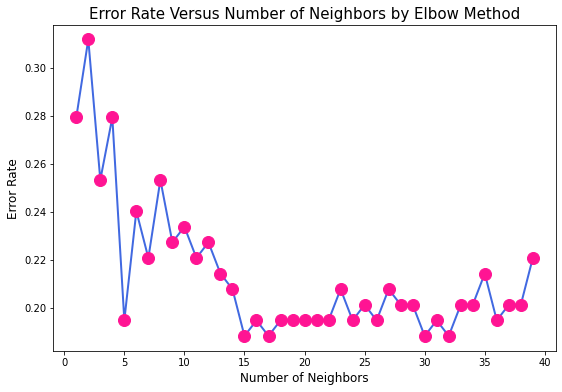

In [23]:
plt.figure(figsize=(9,6))
plt.plot(list(range(1,40)), error_rate,color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='deeppink', markeredgecolor='deeppink' )
plt.xlabel('Number of Neighbors', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate Versus Number of Neighbors by Elbow Method', fontsize=15)
plt.show()

We can see that for k=15, 17, 30 and 32 the error rate is minimum.

In [24]:
knc=KNeighborsClassifier(n_neighbors=15)
knc.fit(X_train, y_train)
prediction_knn=knc.predict(X_test)

In [25]:
print(confusion_matrix(y_test,prediction_knn))
print('\n')
print(classification_report(y_test,prediction_knn))
print('Accuracy Score: ',round(accuracy_score(y_test,prediction_knn), ndigits=2))

[[30 17]
 [12 95]]


              precision    recall  f1-score   support

    Diabetic       0.71      0.64      0.67        47
 Nondiabetic       0.85      0.89      0.87       107

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154

Accuracy Score:  0.81


The accuracy of 81% is obtained by KNN model. Now let's test the prediction of our model for given values.

In [26]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [27]:
knc.predict([[0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995]])

array(['Diabetic'], dtype=object)

In [28]:
df['Outcome'].iloc[0]

'Diabetic'

In [29]:
knc.predict([[-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672]])

array(['Nondiabetic'], dtype=object)

In [30]:
df['Outcome'].iloc[3]

'Nondiabetic'

### 4.2. XGBoost Classifier

#### 4.2.1. Splitting the Data

In [31]:
X=df.drop(['Outcome'], axis=1)
y=df['Outcome']

In [32]:
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 4.2.2. Creating the Model

In [33]:
xgbc = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)

In [34]:
xgbc.fit(X_trian,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
prediction_xgbc=xgbc.predict(X_test)

In [36]:
print(confusion_matrix(y_test,prediction_xgbc))
print('\n')
print(classification_report(y_test,prediction_xgbc))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,prediction_xgbc), ndigits=2))

[[33 14]
 [14 93]]


              precision    recall  f1-score   support

    Diabetic       0.70      0.70      0.70        47
 Nondiabetic       0.87      0.87      0.87       107

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



Accuracy Score:  0.82


We can see that the XGBoost Classifier has 82% accuracy in predictiong the result of diabetes.

## 5. Conclusion

-  Here we worked on Pima Indians Diabetes Dataset and implemented XGboost and K-Nearest neighbors Classifications to predict whether the patients have diabetes. 
-  The accuracy of 81% was obtained by K-Nearest Neighbors Classifier. 
-  The XGBoost Classifier performed pretty well with 82% accuracy in predicting the result of diabetes.